In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import uproot

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from matplotlib import gridspec
import os

In [5]:
from geeksw.utils.data_loader_tools import TreeWrapper

In [6]:
import libwwz

In [7]:
from libwwz import baby_analysis

In [8]:
xsec = libwwz.utils.xsec

In [40]:
ls /scratch/rembser/babies/WVZMVA2017_v0.1.21

data_Run2017B_ee_1.root           ttw_lnu_amcatnlo_1.root
data_Run2017B_em_1.root           ttz_ll_mll1_amcatnlo_1.root
data_Run2017B_mm_1.root           ttz_llvv_mll10_amcatnlo_1.root
data_Run2017C_ee_1.root           tw_antitopnofullhad_powheg_1.root
data_Run2017C_em_1.root           tw_topnofullhad_powheg_1.root
data_Run2017C_mm_1.root           twz_ll_madgraph_1.root
data_Run2017D_ee_1.root           tZq_ll_madgraph_1.root
data_Run2017D_em_1.root           vh_nonbb_amcatnlo_1.root
data_Run2017D_mm_1.root           vh_nonbbwwzz_amcatnlo_1.root
data_Run2017E_ee_1.root           wg_lvg_madgraph_1.root
data_Run2017E_em_1.root           wh_ww_amcatnlo_1.root
data_Run2017E_mm_1.root           wh_zz_amcatnlo_1.root
data_Run2017F_ee_1.root           wjets_incl_madgraph_1.root
data_Run2017F_em_1.root           ww_2l_powheg_1.root
data_Run2017F_mm_1.root           wwg_amcatnlo_1.root
dy_m1050_madgraph_1.root          www_amcatnlo_1.root
dy_m50_madgraph_1.root            wwz_4l2v_amcatnlo_1.r

In [265]:
baby_sample_names = {
    "WWZ_4l" : "wwz_4l2v_amcatnlo_1",
    "TTZnlo" : "ttz_llvv_mll10_amcatnlo_1",
}

In [274]:
yields = dict()
yields_3el = dict()
yields_3mu = dict()

In [275]:
samples = ["WWZ_4l", "TTZnlo"]

In [276]:
for sample in samples:
    
    print(sample)

    year = 2017
    sample_name = baby_sample_names[sample]
    #sample_name = "ttz_llvv_mll10_amcatnlo_1"
    # year = 2016
    # sample_name = "wwz_amcatnlo_1"

    tag = "WVZMVA{0}_v0.1.21".format(year)
    # tag = "WVZMVA{0}_v0.1.15".format(year)
    # tag = "WVZ{0}_v0.1.12.7".format(year)

    root_file_name = "/scratch/rembser/babies/{0}/{1}.root".format(tag, sample_name)

    f = uproot.open(root_file_name)

    entrystop = None

    wvz = TreeWrapper(f["t"], n_max_events=entrystop, extendable=True)

    # These columns are sample, year or tag dependent. We don't want to set them in
    # `run_baby_analysis` such that the analysis function itself is independent of these conditions

    wvz["evt_weight"] = libwwz.baby_analysis.event_weight(wvz, sample_name, year, tag)
    wvz["gen_filter"] = libwwz.baby_analysis.cut_gen_filter(wvz, sample_name, year)

    tgt = libwwz.baby_analysis.run_baby_analysis(wvz)
    
    is_3el = wvz["lep_id"][wvz["lep_is_z"]].prod() == -121
    yields_3el[sample] = libwwz.baby_analysis.get_yields_after_cuts(tgt[is_3el], cuts_to_show)
    yields_3mu[sample] = libwwz.baby_analysis.get_yields_after_cuts(tgt[~is_3el], cuts_to_show)
    yields[sample] = libwwz.baby_analysis.get_yields_after_cuts(tgt, cuts_to_show)

WWZ_4l
addig cut Root...
addig cut EventWeight...
addig cut GenFilter...
addig cut Weight...
addig cut FourLeptons...
addig cut CutHLT...
addig cut FindTwoOSNominalLeptons...
addig cut Cut4LepLowMll...
addig cut Cut4LepLeptonPt...
addig cut FindZCandLeptons...
addig cut Cut4LepBVeto...
addig cut ChannelEMu...
addig cut ChannelOnZ...
addig cut ChannelOnZNjet...
addig cut ChannelOffZ...
addig cut ChannelOffZHighMET...
addig cut ChannelOffZLowMET...
addig cut ChannelOffZHighMT...
addig cut ChannelOffZLowMT...
TTZnlo
addig cut Root...
addig cut EventWeight...
addig cut GenFilter...
addig cut Weight...
addig cut FourLeptons...
addig cut CutHLT...
addig cut FindTwoOSNominalLeptons...
addig cut Cut4LepLowMll...
addig cut Cut4LepLeptonPt...
addig cut FindZCandLeptons...
addig cut Cut4LepBVeto...
addig cut ChannelEMu...
addig cut ChannelOnZ...
addig cut ChannelOnZNjet...
addig cut ChannelOffZ...
addig cut ChannelOffZHighMET...
addig cut ChannelOffZLowMET...
addig cut ChannelOffZHighMT...
addig 

In [138]:
cuts_to_show = [
    "GenFilter",
    "FourLeptons",
    "CutHLT",
    "FindTwoOSNominalLeptons",
    "Cut4LepLowMll",
    "Cut4LepLeptonPt",
    "FindZCandLeptons",
    "Cut4LepBVeto",
    "ChannelEMu"
]

In [143]:
#initial_xsec = xsec["TTZnlo"] * 41.3

In [245]:
def diff_ratio(a, ref=None, initial=1.):
    if ref is None:
        ref = a
    return np.concatenate([[a[0] / initial - 1.], a[1:]/ref[:-1] - 1])

WWZ_4l


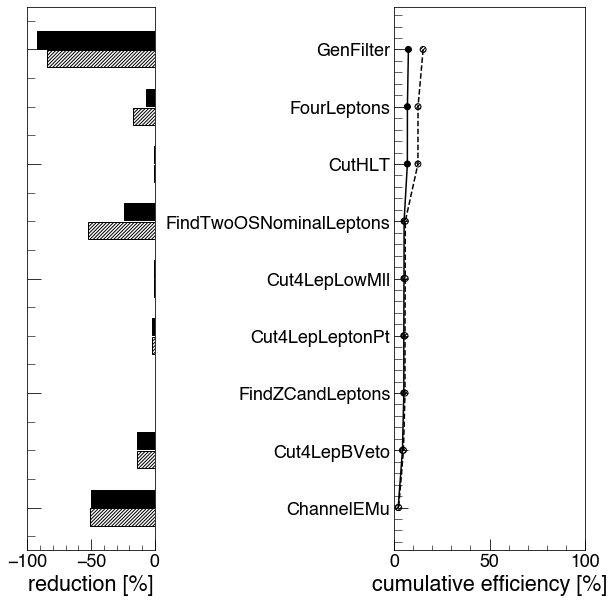

TTZnlo


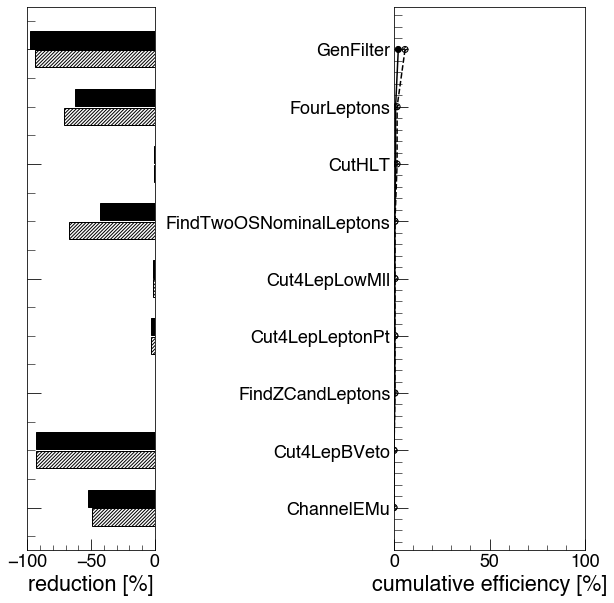

In [279]:
for sample in samples:
    print(sample)

    initial_xsec = xsec[sample] * 41.3 * 0.66**3

    x_range = np.array(range(len(cuts_to_show)))

    plt.figure(figsize=(10,10))

    gs = gridspec.GridSpec(1, 2, width_ratios=[0.4, 0.6])

    axis = plt.subplot(gs[1])
    axr = plt.subplot(gs[0])


    #gs.update(wspace=0.025, hspace=0.075)
    gs.update(wspace=1.5)
    #plt.setp(axis.get_xticklabels(), visible=False)
    plt.setp(axr.get_yticklabels(), visible=False)

    plotstyles = {
        "style" : ["-", "--"],
        "bar_color" : ["k", "w"],
    }

    width = 0.3

    hatch = '///////'

    for i_flav, yields_i in enumerate([yields_3el[sample], yields_3mu[sample]]):
        values = yields_i.values

        axis.plot(values / initial_xsec * 100,
                  -x_range,
                  plotstyles["style"][i_flav],
                  color='k')
        axis.scatter(values / initial_xsec * 100,
                     -x_range,
                 edgecolor='k', facecolor=plotstyles["bar_color"][i_flav], hatch=hatch)
        axr.barh(-(x_range + (i_flav - 0.5) * width * 1.1),
                diff_ratio(values / initial_xsec) * 100,
                height=width,
                color=plotstyles["bar_color"][i_flav],
                hatch=hatch, edgecolor='k')

    axis.set_xlim(0, 100)
    axr.set_xlim(-100, 0)
    axis.set_ylim(axr.get_ylim())

    #axis.grid()
    #axr.grid()

    axis.set_yticks(np.arange(-len(cuts_to_show) + 1, 1, 1.0))


    #labels = [item.get_text() for item in axis.get_yticklabels()]
    #labels[1] = 'Testing'

    axis.set_yticklabels(cuts_to_show[::-1])

    axis.set_xlabel("cumulative efficiency [%]")
    axr.set_xlabel("reduction [%]")


    plt.show()

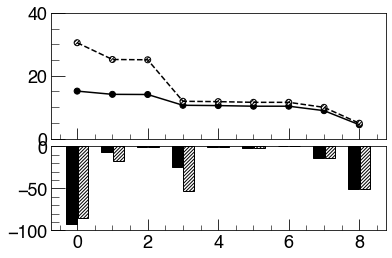

In [189]:

gs = gridspec.GridSpec(2, 1, height_ratios=[0.6, 0.4])

axis = plt.subplot(gs[0])
axr = plt.subplot(gs[1])


gs.update(wspace=0.025, hspace=0.075)
plt.setp(axis.get_xticklabels(), visible=False)

plotstyles = {
    "style" : ["-", "--"],
    "bar_color" : ["k", "w"],
}

width = 0.3

hatch = '///////'

for i_flav, yields in enumerate([yields_stepped_3el, yields_stepped_3mu]):
    values = yields.values

    axis.plot(x_range, values / initial_xsec * 100 * 2, plotstyles["style"][i_flav],
              color='k')
    axis.scatter(x_range, values / initial_xsec * 100 * 2,
             edgecolor='k', facecolor=plotstyles["bar_color"][i_flav], hatch=hatch)
    axr.bar(x_range + (i_flav - 0.5) * width * 1.1, diff_ratio(values / initial_xsec) * 100, width=width,
            color=plotstyles["bar_color"][i_flav],
            hatch=hatch, edgecolor='k')

axis.set_ylim(0, 40)
axr.set_ylim(-100, 0)
axis.set_xlim(axr.get_xlim())

plt.show()

In [147]:
diff_ratio(yields_stepped.values)

array([ 1.01560268e+01, -1.39436634e-01, -3.76581817e-03, -4.25288450e-01,
       -9.18930708e-03, -1.87930641e-02,  0.00000000e+00, -1.37895710e-01,
       -5.06256447e-01])

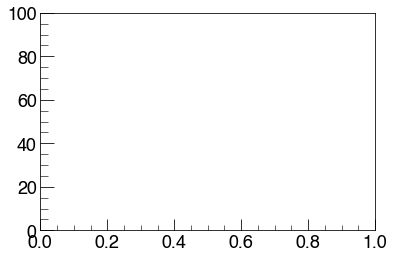

In [148]:

#plt.semilogy([], [])
plt.ylim(0, 100)
plt.show()